In [1]:
import shutil
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from resipy import Project
from gp_tools.ert.utils import OHMfile

warnings.filterwarnings('ignore')

API path =  c:\Users\peter\miniforge3\envs\general_gp\Lib\site-packages\resipy
ResIPy version =  3.6.1
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
# Create project
k = Project(typ='R2', dirname='./temp_dir')

# defining electrode array
number_electrodes = 64
seperation_electrodes = 1 # in Meters
elec = np.zeros((number_electrodes, 3))
elec[:,0] = np.arange(0, number_electrodes*seperation_electrodes, seperation_electrodes)
k.setElec(elec)

# Create mesh
cl_factor = 1
cl = 0.25
k.createMesh(typ='trian', cl_factor=cl_factor, cl=cl, show_output=False, res0=100)

# add region
k.addRegion(np.array([[2,-4],[2,-10],[50,-10],[50,-4],[2,-4]]), 200)

# define sequence
k.createSequence([('dpdp1', 2, number_electrodes)]) #Configuration, skip+1, number of electrodes
print(k.sequence)

Working directory is: c:\Users\peter\Documents\02_coding\02_Geophysics\geophysics_repo\tutorials\ERT\temp_dir
clearing dirname
Creating triangular mesh...done (112401 elements)
870 quadrupoles generated.
[[ 1  3  5  7]
 [ 2  4  6  8]
 [ 3  5  7  9]
 ...
 [ 4  6 62 64]
 [ 1  3 61 63]
 [ 2  4 62 64]]


Writing .in file and mesh.dat... done
Writing protocol.dat... done
Running forward model... 

 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 15 - 05 - 2025
 >> My beautiful survey                                                             
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat               

 Measurements read:   870     Measurements rejected:     0

 >> Total Memory required is:          0.039 Gb
filterData: 0 / 870 quadrupoles removed.
0/870 reciprocal measurements found.
Forward modelling done.
ERROR: No sensitivity attribute found


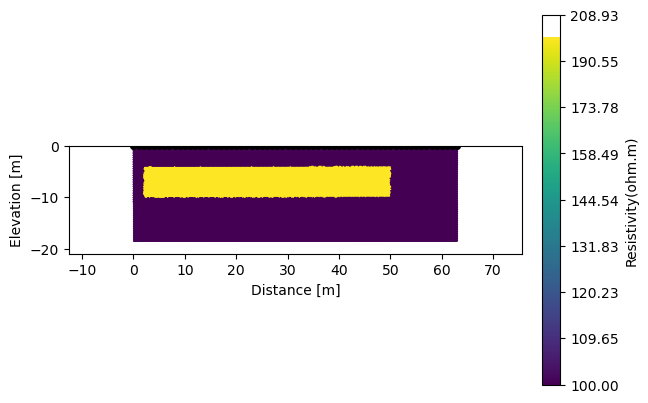

In [3]:
# Error for forward modeling: relative resistance error
relErr = 2 # %
# forward modelling
k.forward(noise=relErr)

# show the initial and recovered section
k.showResults(index=0)

In [6]:
data = k.surveys[0].df[['a', 'b', 'm', 'n', 'resist']]
data.rename(columns={'resist': 'r'}, inplace=True)
electrodes = k.elec[['x', 'y', 'z']]

In [7]:
_ = OHMfile.write(filepath='simulated.ohm', data=data, electrodes=electrodes)

File already exists. Overwritting.


In [9]:
shutil.rmtree('temp_dir')